## Источники для вдохновения

- https://matplotlib.org/stable/gallery/index.html
- https://seaborn.pydata.org/
- https://pandas.pydata.org/docs/user_guide/visualization.html

In [84]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('credit_train.csv')

In [86]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,4.454e+05,Short Term,709.0,1.167e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,2.623e+05,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,1.000e+08,Short Term,741.0,2.232e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,3.477e+05,Long Term,721.0,8.069e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,1.762e+05,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### Описание набора данных
Ссылка на Kaggle: https://www.kaggle.com/datasets/zaurbegiev/my-dataset?select=credit_test.csv
- Loan ID — номер заявки
- Customer ID — номер заёмщика
- Loan Status — статус кредита
- Current Loan Amount — текущая сумма кредита
- Term — срок
- Credit Score — кредитный рейтинг
- Annual Income — годовой доход
- Years in current job — кол-во лет на текущей работе
- Home Ownership — владеет ли домом (и каким)
- Purpose — цель кредита
- Monthly Debt — ежемесячный платёж
- Years of Credit History — лет кредитной истории
- Months since last delinquent — месяцов с последней просрочки
- Number of Open Accounts — кол-во открытых счетов
- Number of Credit Problems — кол-во проблем с кредитом
- Current Credit Balance — текущий кредитный баланс
- Maximum Open Credit — максимальный открытый кредит
- Bankruptcies — банкротств
- Tax Liens — налоговый залог

In [109]:
df.shape()

TypeError: 'tuple' object is not callable

In [88]:
df.info()
#Credit Score и Annual Income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [89]:
df.dropna(inplace=True,subset=['Annual Income','Credit Score']) #дроп строк
df.reset_index(inplace=True)

In [90]:
df = df.convert_dtypes() #меняем тип колонок
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         80846 non-null  Int64  
 1   Loan ID                       80846 non-null  string 
 2   Customer ID                   80846 non-null  string 
 3   Loan Status                   80846 non-null  string 
 4   Current Loan Amount           80846 non-null  Int64  
 5   Term                          80846 non-null  string 
 6   Credit Score                  80846 non-null  Int64  
 7   Annual Income                 80846 non-null  Int64  
 8   Years in current job          77434 non-null  string 
 9   Home Ownership                80846 non-null  string 
 10  Purpose                       80846 non-null  string 
 11  Monthly Debt                  80846 non-null  Float64
 12  Years of Credit History       80846 non-null  Float64
 13  M

In [91]:
df.fillna(method = 'pad', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         80846 non-null  Int64  
 1   Loan ID                       80846 non-null  string 
 2   Customer ID                   80846 non-null  string 
 3   Loan Status                   80846 non-null  string 
 4   Current Loan Amount           80846 non-null  Int64  
 5   Term                          80846 non-null  string 
 6   Credit Score                  80846 non-null  Int64  
 7   Annual Income                 80846 non-null  Int64  
 8   Years in current job          80846 non-null  string 
 9   Home Ownership                80846 non-null  string 
 10  Purpose                       80846 non-null  string 
 11  Monthly Debt                  80846 non-null  Float64
 12  Years of Credit History       80846 non-null  Float64
 13  M

In [92]:
pd.set_option('display.precision',3)
df.describe() # проверить наличие непонятных значений

,index,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,80846.000,8.085e+04,80846.000,8.085e+04,80846.000,80846.000,80845.000,80846.000,80846.000,8.085e+04,8.085e+04,80846.000,80846.000
mean,50036.172,1.447e+07,1076.456,1.378e+06,18510.579,18.184,34.939,11.143,0.170,2.951e+05,7.352e+05,0.119,0.030
std,28851.614,3.480e+07,1475.404,1.081e+06,12233.910,7.006,21.985,5.029,0.488,3.817e+05,6.890e+06,0.354,0.265
min,0.000,1.124e+04,585.000,7.663e+04,0.000,3.700,0.000,1.000,0.000,0.000e+00,0.000e+00,0.000,0.000
25%,25097.250,1.865e+05,705.000,8.488e+05,10244.040,13.500,16.000,8.000,0.000,1.126e+05,2.719e+05,0.000,0.000
50%,50046.500,3.247e+05,724.000,1.174e+06,16256.115,16.900,32.000,10.000,0.000,2.104e+05,4.664e+05,0.000,0.000
75%,74989.500,5.496e+05,741.000,1.651e+06,24050.865,21.700,51.000,14.000,0.000,3.682e+05,7.800e+05,0.000,0.000
max,99999.000,1.000e+08,7510.000,1.656e+08,435843.280,70.500,176.000,76.000,15.000,3.288e+07,1.540e+09,7.000,15.000


### Зачем нужна визуализация?

- Интуитивное понимание данных
- Обнаружение паттернов/зависимостей в данных
- Построение гипотез


- Создание отчётности и мониторинга процесса
- Подготовка презентаций для заказчиков/работодателей

### Пример

Ваш одногруппник создал приложение и разместил его в Google Play, Apple Store, etc. После чего выступает на вашей общей паре и говорит, что оценка его приложения 4/5. Какие уточняющие вопросы вы бы могли задать, чтобы понять нужно ли хвалить одногруппника?)

.


.


.


.


.


.


.


.


.
.
.








### Что важно оценить?

- Сколько пользователей оценило приложение?
- Кто эти люди?
- Репрезентативна ли эта оценка?
- Насколько дозрела оценка (Стало лучши или хуже)?

### Для категориальных/бинарных признаков 

In [93]:
print(df['Home Ownership'].value_counts())
df.loc[df['Home Ownership']== 'HaveMortgage','Home Ownership']  = 'Home Mortgage'
print(df['Home Ownership'].value_counts())

Home Mortgage    39089
Rent             34092
Own Home          7480
HaveMortgage       185
Name: Home Ownership, dtype: Int64
Home Mortgage    39274
Rent             34092
Own Home          7480
Name: Home Ownership, dtype: Int64


<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

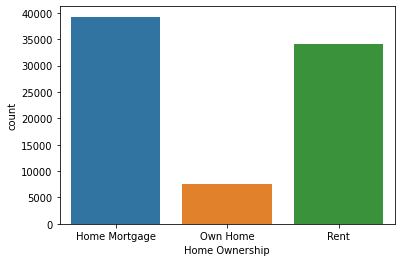

In [94]:
sns.countplot(df['Home Ownership'])

([<matplotlib.patches.Wedge at 0x28bb078c308>,
 [Text(0.049097490037622246, 1.098903743042131, 'Home Mortgage'),
  Text(-0.36197229446312895, -1.0387377234129402, 'Own Home'),
  Text(1.0538588286687771, -0.3152484246382103, 'Rent')],
 [Text(0.026780449111430314, 0.5994020416593441, '49%'),
  Text(-0.19743943334352484, -0.5665842127706946, '42%'),
  Text(0.5748320883647875, -0.1719536861662965, '9%')])

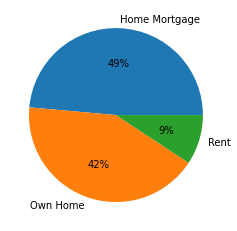

In [95]:
plt.pie(df['Home Ownership'].value_counts(), labels = df['Home Ownership'].unique(), autopct='%.0f%%')

In [98]:
#Распределение признака по частоте
df['Years in current job'].value_counts()

10+ years    26423
2 years       7694
3 years       6897
< 1 year      6864
5 years       5736
1 year        5412
4 years       5138
6 years       4793
7 years       4707
8 years       3877
9 years       3305
Name: Years in current job, dtype: Int64

In [99]:
#Если возникла необходимость в проверки нескольких значений
df['Years in current job'].value_counts().head(3).index

Index(['10+ years', '2 years', '3 years'], dtype='object')

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

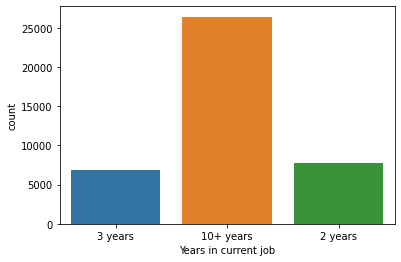

In [101]:
#Отображаем топ 3 признака по кол-ву
sns.countplot(df[df['Years in current job'].isin(df['Years in current job'].value_counts().head(3).index)]['Years in current job'])

<AxesSubplot:xlabel='Term', ylabel='count'>

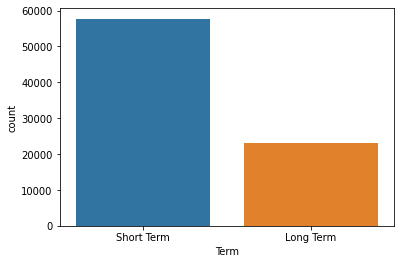

In [102]:
# Для бинарных также 
sns.countplot(df['Term'])

### Для колличественных признаков

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

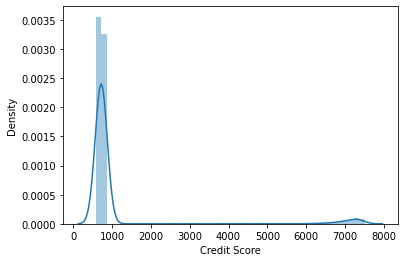

In [103]:
sns.distplot(df['Credit Score']) # распределение данных

<AxesSubplot:>

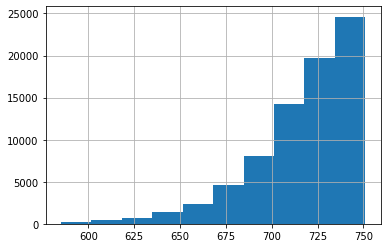

In [104]:
df.loc[df['Credit Score']<2000,'Credit Score'].hist()  # распределение данных

<AxesSubplot:xlabel='Credit Score'>

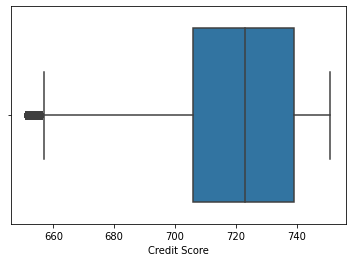

In [105]:
sns.boxplot(df.loc[(df['Credit Score']<2000) & (df['Credit Score']>650),'Credit Score'])

Источник https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
![jupyter](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'Current Loan Amount'}>,
        <AxesSubplot:title={'center':'Credit Score'}>,
        <AxesSubplot:title={'center':'Annual Income'}>],
       [<AxesSubplot:title={'center':'Monthly Debt'}>,
        <AxesSubplot:title={'center':'Years of Credit History'}>,
        <AxesSubplot:title={'center':'Months since last delinquent'}>,
        <AxesSubplot:title={'center':'Number of Open Accounts'}>],
       [<AxesSubplot:title={'center':'Number of Credit Problems'}>,
        <AxesSubplot:title={'center':'Current Credit Balance'}>,
        <AxesSubplot:title={'center':'Maximum Open Credit'}>,
        <AxesSubplot:title={'center':'Bankruptcies'}>],
       [<AxesSubplot:title={'center':'Tax Liens'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

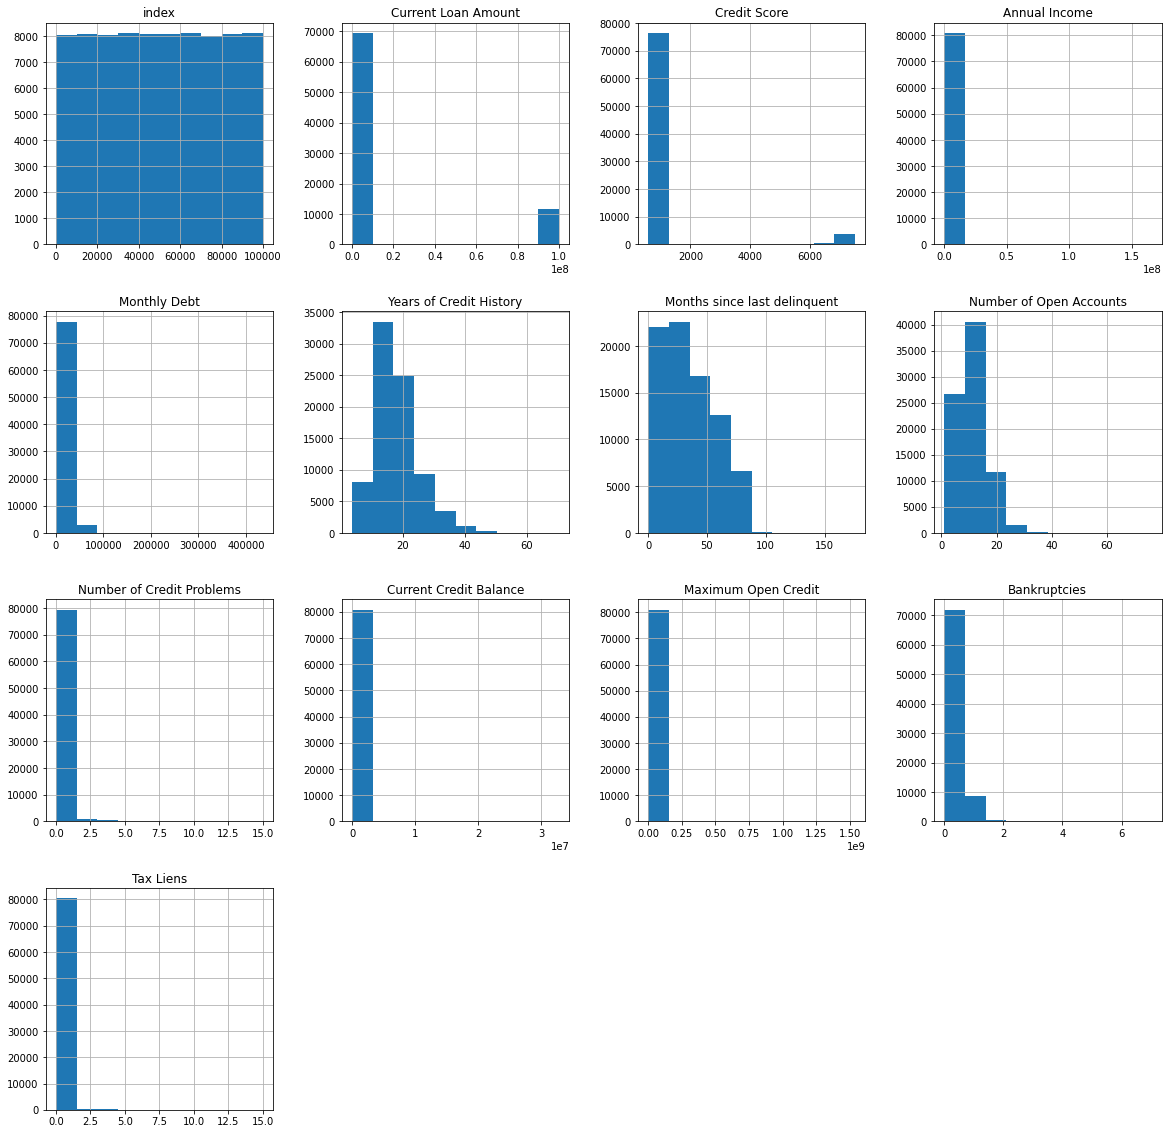

In [106]:
#Гистограмма по всем колличественных признакам
df.hist(figsize =(20,20))

- Временное — гистограммы, графики
- Частотное сравнение (концентрация, распредление) —  гистограммы, графики
- Корреляционное — линейчатая диаграмма, точечная диаграмма

## Взаимодействие признаков

### количественный — количественный

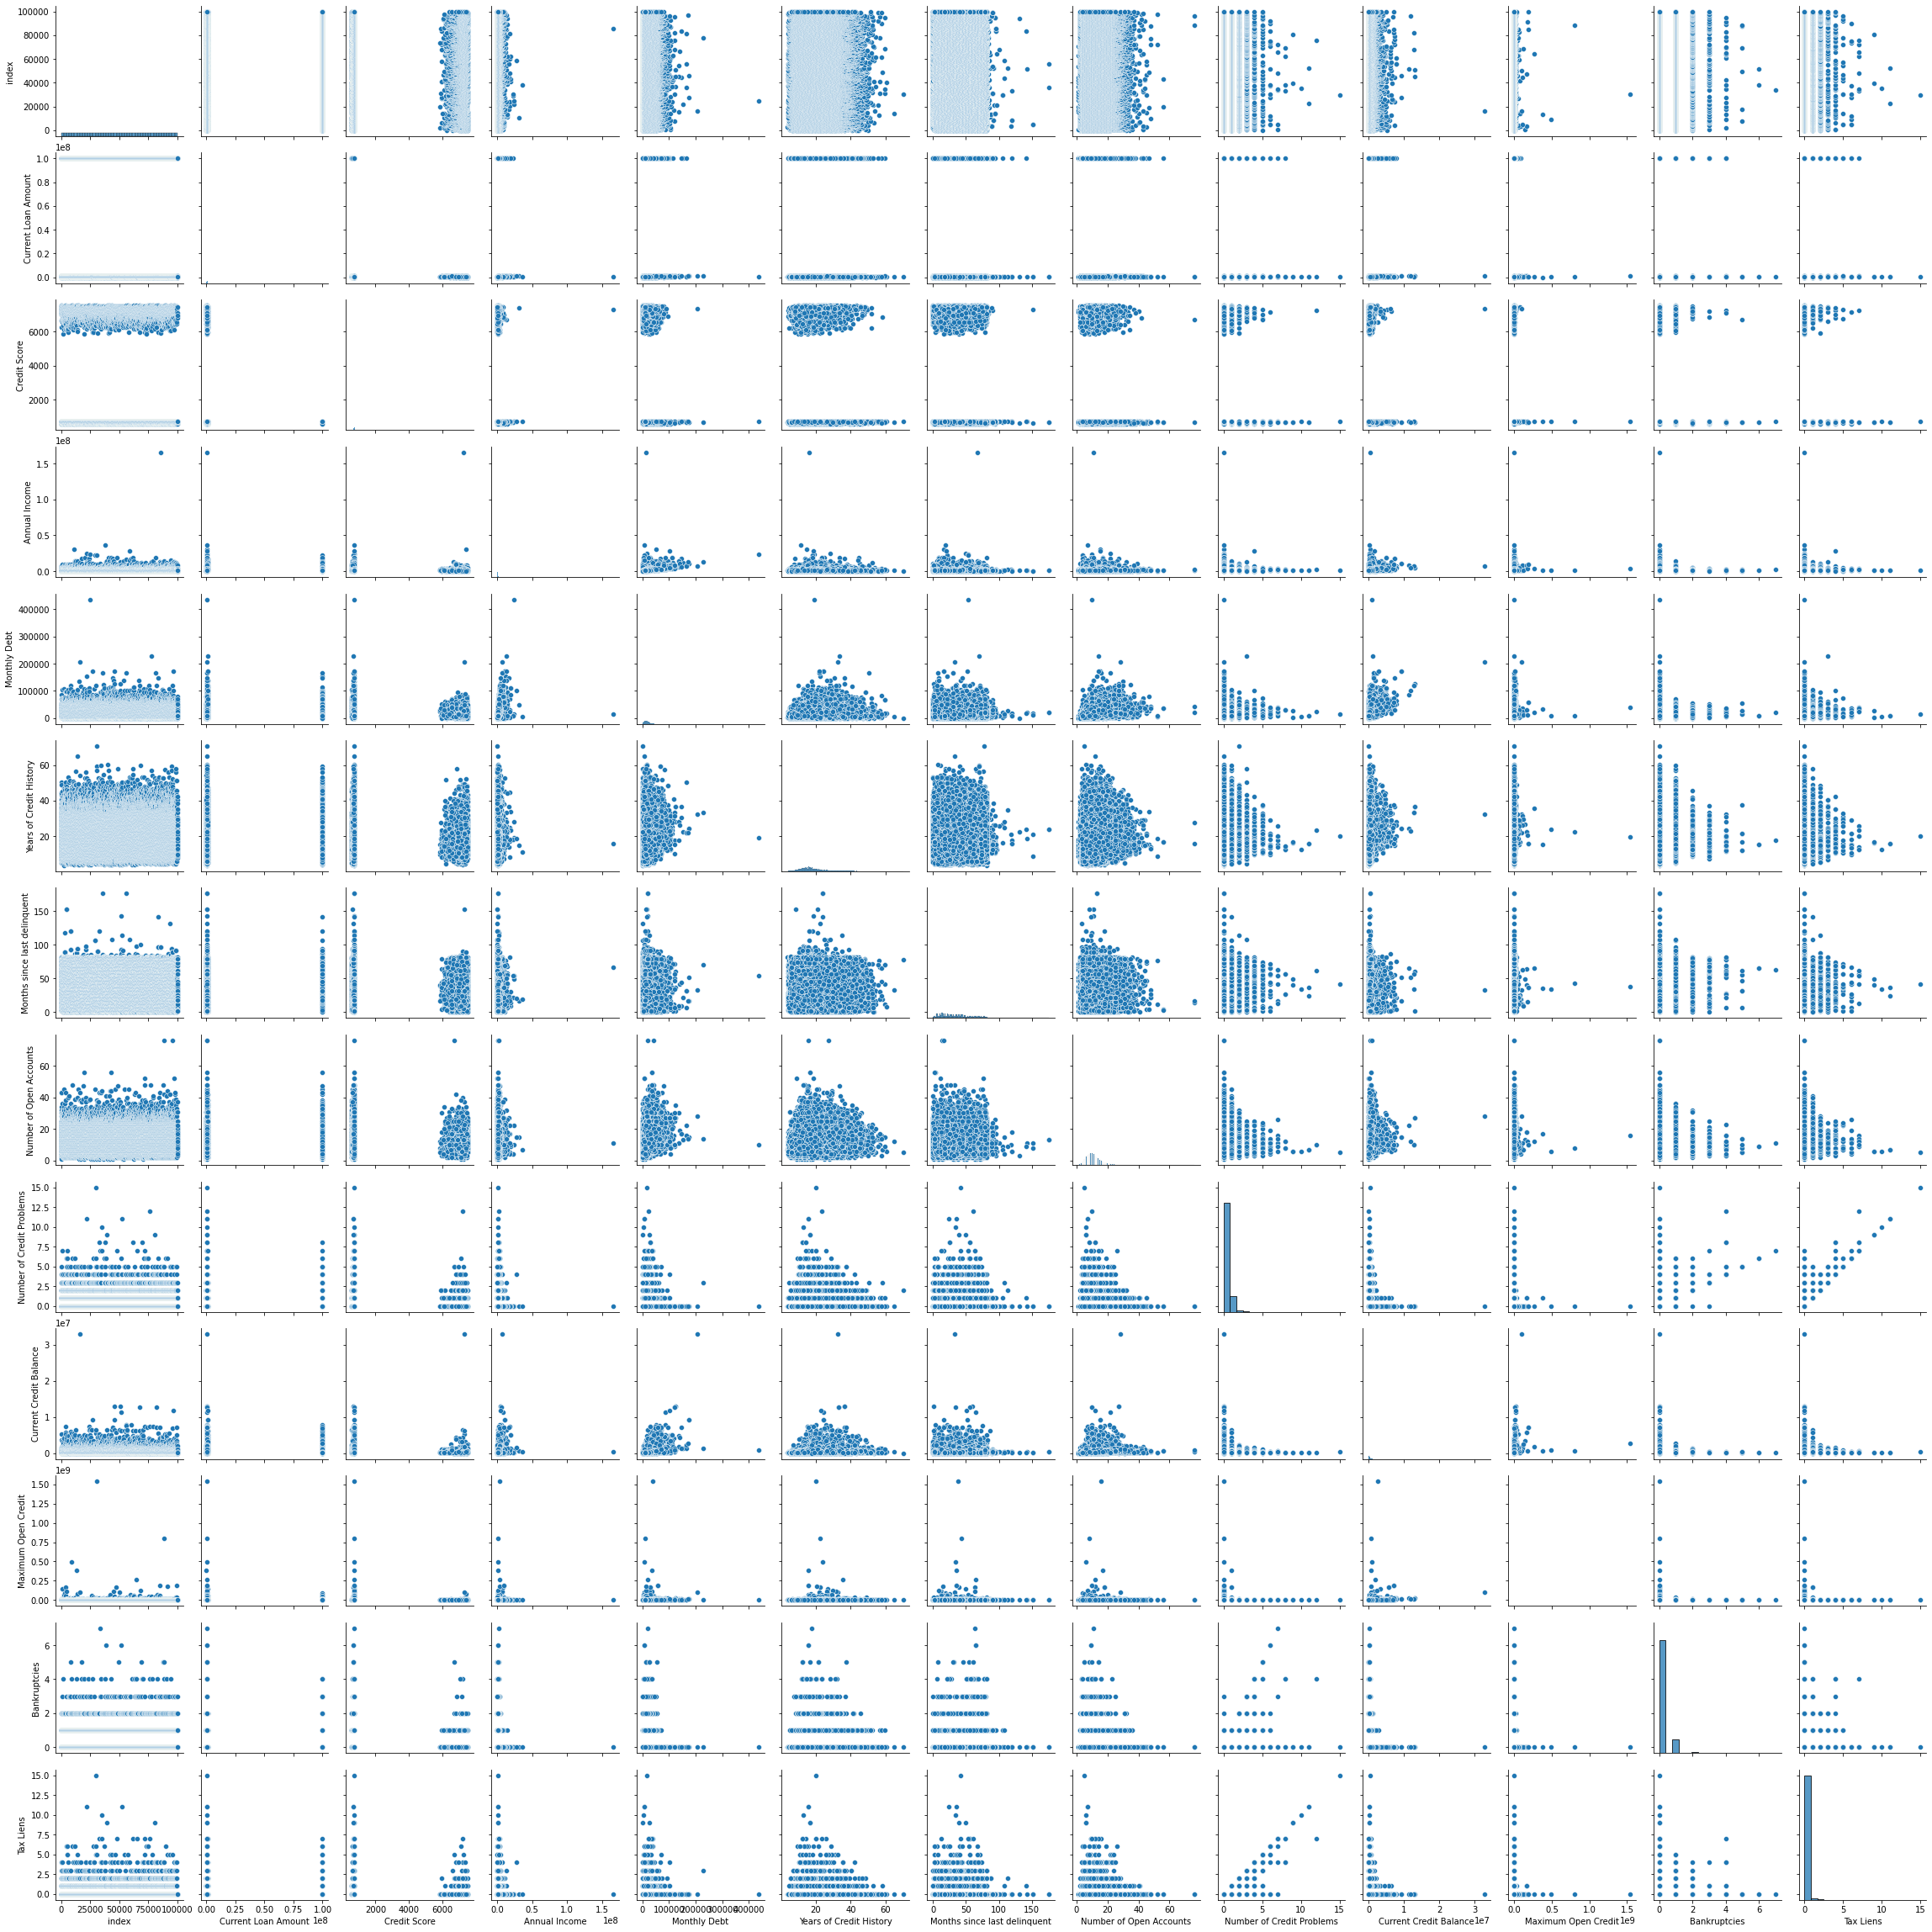

In [107]:
# Диаграмма рассеивания
sns.pairplot(df)

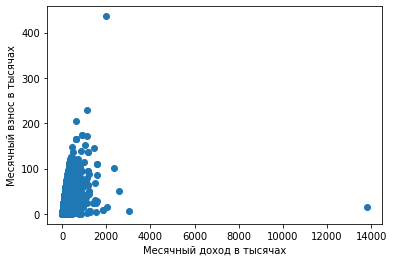

In [110]:
plt.scatter(df['Annual Income']/12/1000, df['Monthly Debt']/1000);
plt.xlabel('Месячный доход в тысячах');
plt.ylabel('Месячный взнос в тысячах');

In [111]:
df['Loan Status'].value_counts()

Fully Paid     63636
Charged Off    17210
Name: Loan Status, dtype: Int64

In [112]:
df['Loan Status'].map({'Fully Paid': 'blue', 'Charged Off': 'orange'}).head()

0      blue
1      blue
2      blue
3    orange
4      blue
Name: Loan Status, dtype: object

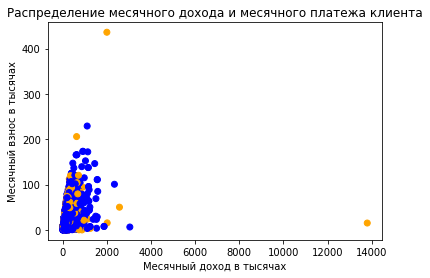

In [113]:
plt.scatter(df['Annual Income']/12/1000, df['Monthly Debt']/1000, 
            color=df['Loan Status'].map({'Fully Paid': 'blue', 'Charged Off': 'orange'})
            );
plt.title('Распределение месячного дохода и месячного платежа клиента')
plt.xlabel('Месячный доход в тысячах')
plt.ylabel('Месячный взнос в тысячах')

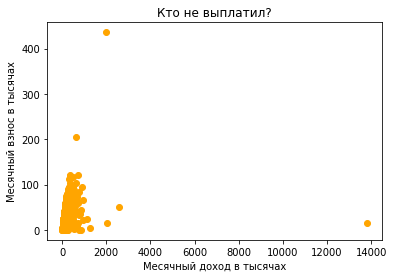

In [114]:
l1 =plt.scatter(df[df['Loan Status'] == 'Charged Off']['Annual Income']/12/1000,df[df['Loan Status'] == 'Charged Off']['Monthly Debt']/1000,color='orange')
plt.xlabel('Месячный доход в тысячах')
plt.ylabel('Месячный взнос в тысячах')
plt.title('Кто не выплатил?')

In [116]:
df.corr('spearman')

,index,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
index,1.000e+00,-0.004,-6.421e-04,0.002,0.004,4.319e-04,-0.007,0.001,-0.002,-8.997e-04,7.858e-05,-5.411e-04,0.001
Current Loan Amount,-4.147e-03,1.000,-3.767e-02,0.382,0.315,1.405e-01,-0.014,0.167,-0.069,3.460e-01,3.442e-01,-7.386e-02,0.012
Credit Score,-6.421e-04,-0.038,1.000e+00,0.014,-0.077,8.217e-02,0.024,-0.010,-0.067,-7.170e-03,1.430e-01,-5.116e-02,-0.028
Annual Income,1.998e-03,0.382,1.405e-02,1.000,0.594,2.611e-01,-0.040,0.242,-0.041,3.909e-01,3.923e-01,-5.903e-02,0.041
Monthly Debt,4.107e-03,0.315,-7.733e-02,0.594,1.000,2.186e-01,-0.033,0.462,-0.065,5.280e-01,4.316e-01,-7.468e-02,0.021
Years of Credit History,4.319e-04,0.140,8.217e-02,0.261,0.219,1.000e+00,-0.020,0.148,0.079,2.657e-01,2.836e-01,7.807e-02,0.020
Months since last delinquent,-6.688e-03,-0.014,2.434e-02,-0.040,-0.033,-1.991e-02,1.000,-0.023,0.053,-1.025e-03,-1.288e-02,5.447e-02,0.003
Number of Open Accounts,1.425e-03,0.167,-1.024e-02,0.242,0.462,1.482e-01,-0.023,1.000,-0.008,3.761e-01,4.935e-01,-1.731e-02,0.012
Number of Credit Problems,-2.060e-03,-0.069,-6.724e-02,-0.041,-0.065,7.876e-02,0.053,-0.008,1.000,-2.053e-01,-1.715e-01,8.672e-01,0.370
Current Credit Balance,-8.997e-04,0.346,-7.170e-03,0.391,0.528,2.657e-01,-0.001,0.376,-0.205,1.000e+00,7.804e-01,-1.989e-01,-0.030


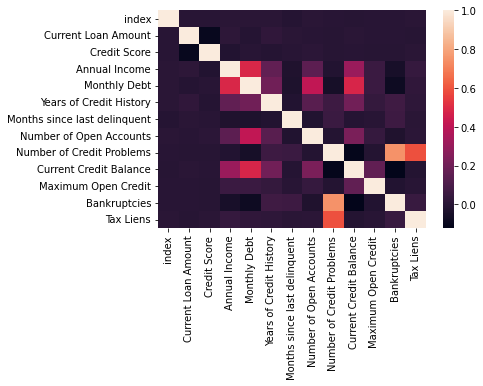

In [119]:
sns.heatmap(df.corr())

### количественный — категориальный

<AxesSubplot:xlabel='Loan Status', ylabel='Annual Income'>

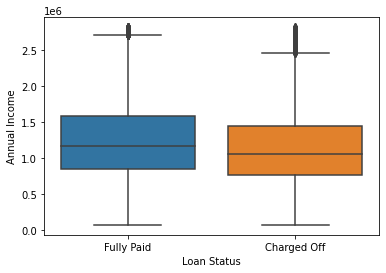

In [120]:
sns.boxplot(x ='Loan Status', y ='Annual Income', data = df.loc[df['Annual Income']<df['Annual Income'].quantile(0.95)])

### Также можно использовать *sns.violinplot* — Скрипичный график

https://datavizcatalogue.com/RU/metody/skripicnyj_grafik.html


<img src="https://datavizcatalogue.com/RU/metody/images/anatomy/SVG/skripicnyj_grafik.svg" width=600 height=600 />


### категориальный — категориальный

In [121]:
pd.crosstab(df['Loan Status'],df['Term'])

Term,Long Term,Short Term
Loan Status,,
Charged Off,6419,10791
Fully Paid,16687,46949


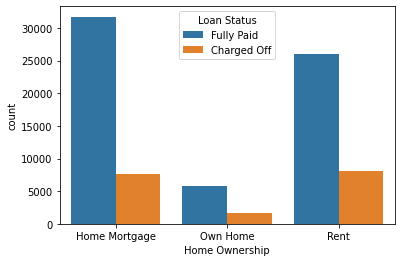

In [122]:
sns.countplot(x='Home Ownership',hue='Loan Status',data = df)

# Задание
Используя набор данных визуализировать различными способами минимум три признака, а также минимум три взаимодействия между признаками.

In [123]:
df = pd.read_csv('Car_sales.csv')

In [124]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.371
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.390
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.499
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.156
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623


# Полезные ресурсы

- https://mipt-stats.gitlab.io/courses/python/09_seaborn.html — гайд от Физтех.Статистика по Seaborn
- https://habr.com/ru/company/otus/blog/540526/ — примеры с Хабра по Seaborn
- https://pythonru.com/biblioteki/seaborn-plot — ещё примеры
- https://pyprog.pro/mpl/mpl_short_guide.html — гайд по Matplotlib
- https://python-scripts.com/matplotlib — ещё по Matplotlib